## Laboratory lab 2 - Regression

### Import library

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, Normalization

from sklearn.metrics import r2_score

### Data Preprocess

The dataset is taken from [Kaggle](https://www.kaggle.com/). It's a fairly simple dataset, containing 10000 rows about how students behaviors affect their final exam performance.

#### Get the data
First download and import the dataset using pandas.

In [98]:
dataset = pd.read_csv("Student_Performance.csv")
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### Preprocess the data

The dataset is already cleaned by the provider, so no data cleaning is needed. However, column `Extracurricular Activities` contains catergorical values, not numerical. Therefore, we need to encode the values in this column

In [99]:
dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


#### Inspect the data

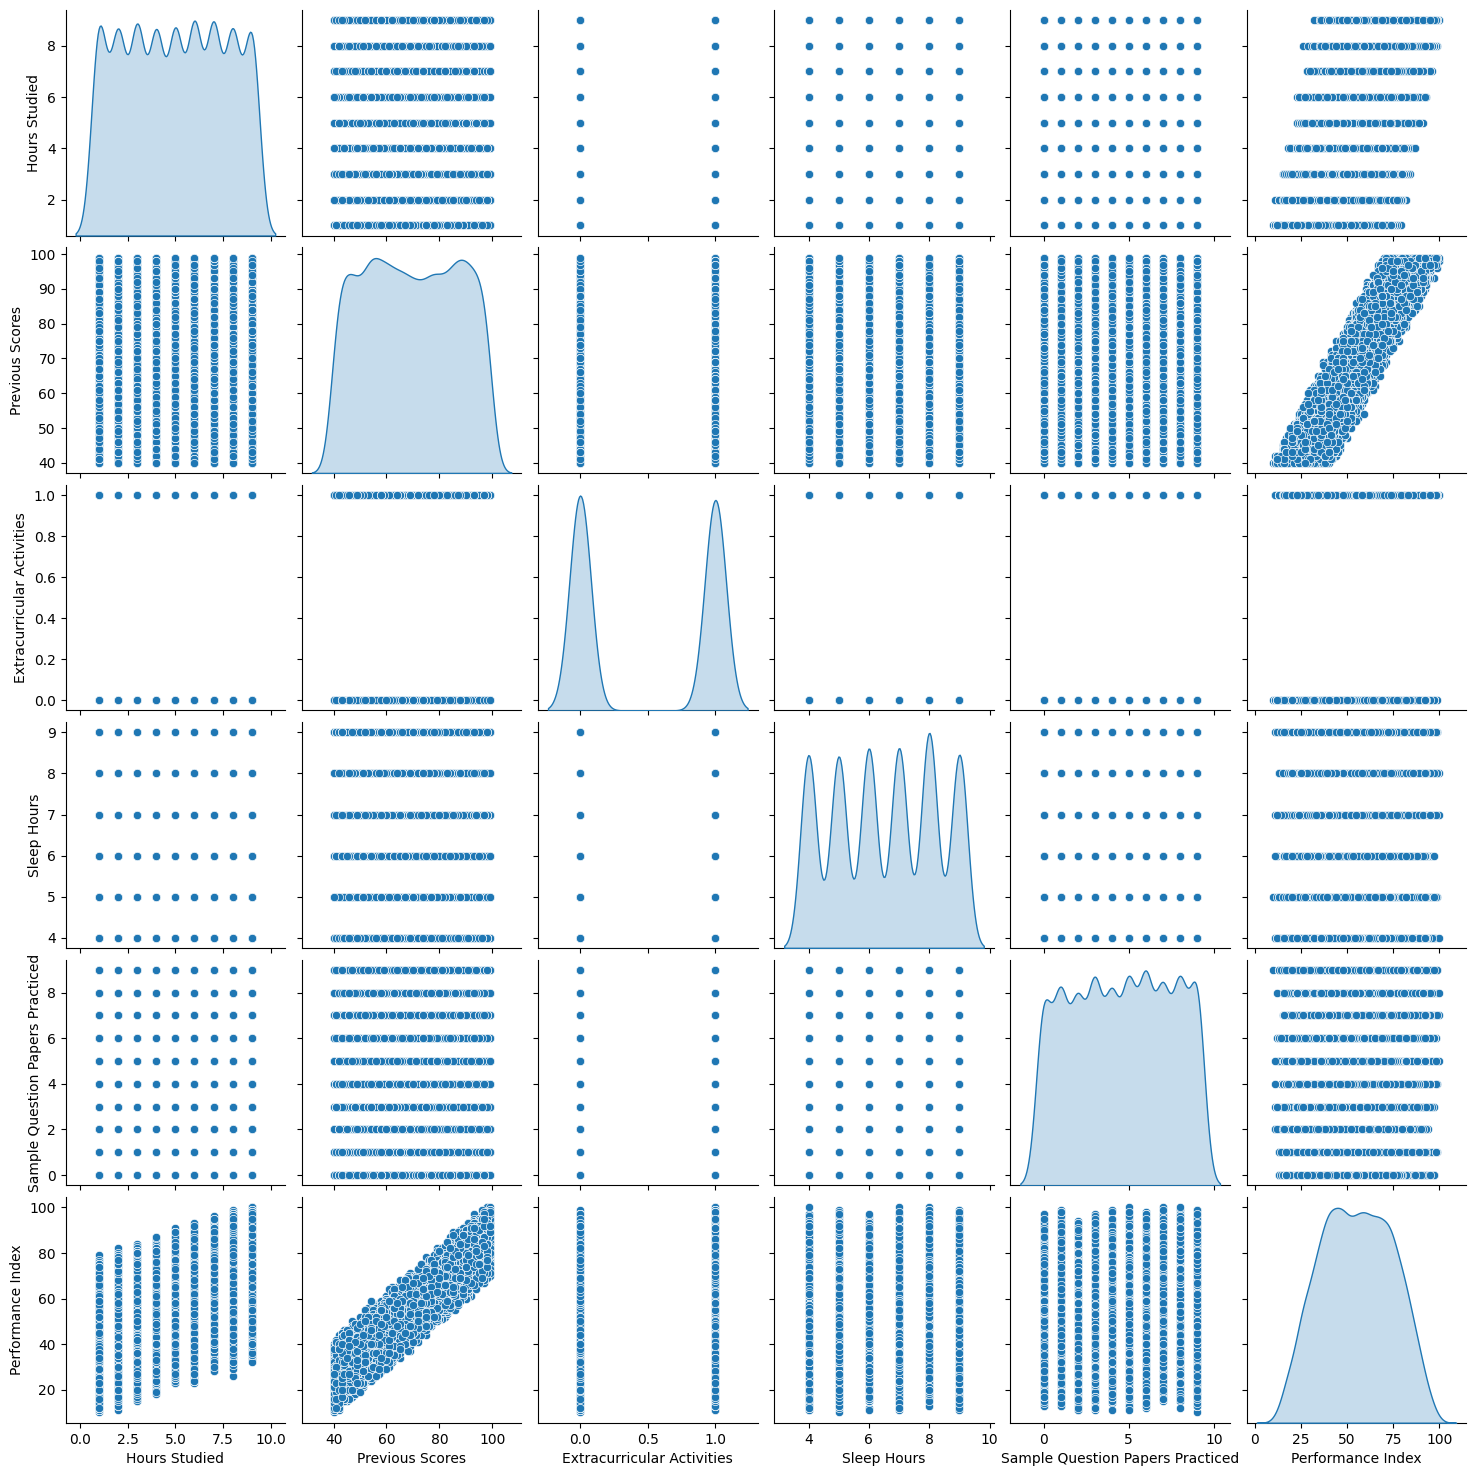

In [100]:
sns.pairplot(dataset[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']], diag_kind='kde')

In [101]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


#### Split data into train set and test set

After pre-processed, the dataset is spllited into train set and test set. For the range of this lab, I choose the simple way that split 80% for training and 20% for testing

In [102]:
# Split the dataset
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [103]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Performance Index')
test_labels = test_features.pop('Performance Index')

#### Normalization

The data in each column has different range, therefore I add a `Normalizer` layer to normalize the dataset before applying the model

In [104]:
# Create Normalization Layer
normalization_layer = Normalization(axis=-1)

# Adapt the Normalizarion Layer with train data
normalization_layer.adapt(np.array(train_features))

### Linear Regression with multiple inputs

To built a Multiple Linear Regression Model, I apply a two-step Keras Sequential model with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) defined earlier and adapted to the whole dataset

In [105]:
# Construct model
linear_model = tf.keras.Sequential([
    normalization_layer,
    layers.Dense(units=1)
])

In [106]:
# Configure model
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

In [107]:
# Train model with 100 epochs
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

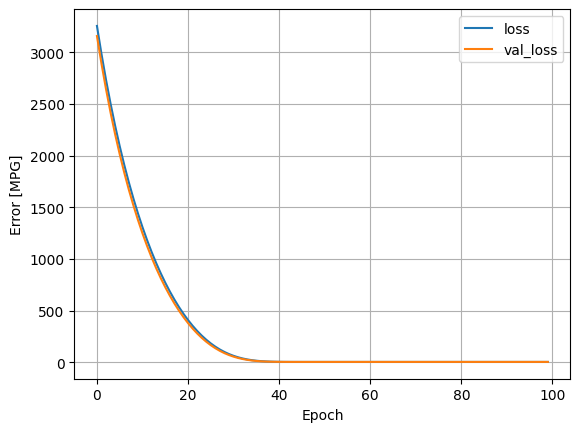

In [108]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [109]:
# Predict the values for the test set
test_predictions = linear_model.predict(test_features)

# Calculate the R-squared value
r_squared = r2_score(test_labels, test_predictions)
print(f'R-squared value: {r_squared}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
R-squared value: 0.9885762346048529
